## Domain:
- Finance and Banking.


## Context:
- Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan.Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status,Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.

## Project Objective:
 1) This is a standard supervised classification task. A classification problem
 where we have to predict whether a customer is eligible for loan or not based on
 a given set of independent variable(s).
 2) To build a Python Flask ML application where a user has to get registered by
 entering the username and password and login to the website and then enter
 their details to check whether they are eligible for loan or not.

## Attribute Information:
1. **Loan ID** -  Unique Loan ID
2. **Gender** -  Male or Female
3. **Married** -  Applicant married (Y/N)
4. **Dependents** -  Number of dependents 
5. **Self employed** -  Self employed (Y/N)
6. **Education** -  Graduate/Undergraduate
7. **Applicant Income** - Applicant income (in dollars)
8. **Co Applicant Income** - Co Applicant Income (in dollars)
9. **Loan Amount** - Loan amount in thousands (in dollars)
10. **Loan Amount Term** - Term of loan in months
11. **Credit History** - Credit history meets guidelines Yes/No(1/0)
12. **Property area** - Urban/Semi Urban/Rural
13. **Loan Status (Target)** - Loan Approved (Y/N)

## ● Model Building and saving the model using Pickle

### Import required libraries and read the dataset. (2)

In [7]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

import pickle

### Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)

In [10]:
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [11]:
def basic_info(df):
    print("shape of dataset:", df.shape, '\n')
    print(df.info())

basic_info(df)

shape of dataset: (614, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB
None


- There are 614 instances with 13 column.
- Some columns values are missing.
- There are 7 object type column

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [14]:
df.describe(include = 'O')

,loan_id,gender,married,education,self_employed,property_area,loan_status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,lp001002,male,yes,graduate,no,semiurban,y
freq,1,489,398,480,500,233,422


- Most of the categorical features are binary in narture and 1 is tertiary.

### Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

- Loan id is redundant for this analysis so i am dropping this.

In [18]:
df.drop('loan_id', axis =1 , inplace = True)

In [19]:
df.isnull().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [20]:
print("Percentage of missing values:")
df.isnull().sum()/ len(df) *100

Percentage of missing values:


gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

- There are 7 column with missing values. Out of them 3 are non-numeric values and 4 (1 categorical ) are numeric value.
- All non-numeric are categorical variable. One non-numeric is categorical (credit_history) variable. 

In [22]:
nan_cat_feature = ['gender', 'married', 'self_employed', 'credit_history']
for col in nan_cat_feature:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [23]:
nan_cont_feature = ['dependents', 'loanamount', 'loan_amount_term']
for col in nan_cont_feature:
    df[col].fillna(df[col].median(), inplace = True)

In [24]:
df.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

In [26]:
df['loan_status'].value_counts()

loan_status
y    422
n    192
Name: count, dtype: int64

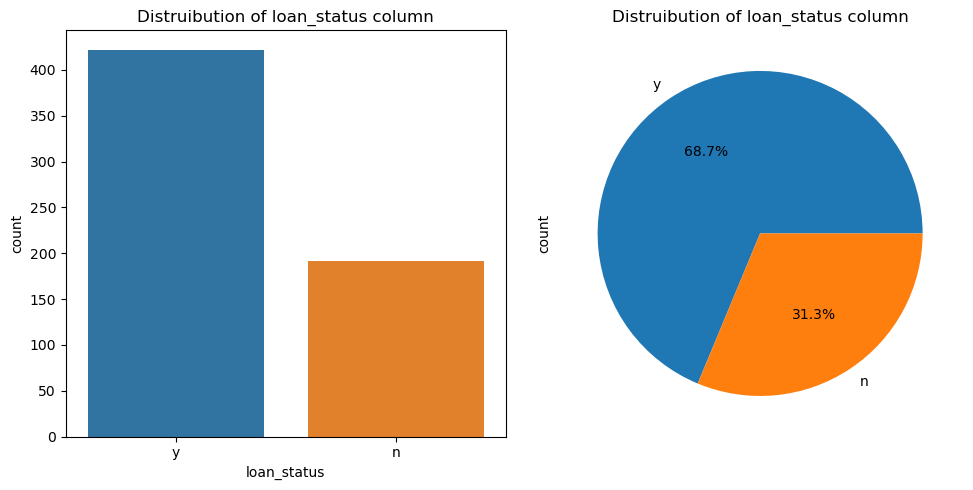

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Distruibution of loan_status column')
sns.countplot(data = df, x = 'loan_status', hue = 'loan_status')

plt.subplot(1, 2, 2)
plt.title('Distruibution of loan_status column')
df['loan_status'].value_counts().plot(kind ='pie', autopct = '%1.1f%%')

plt.tight_layout()
plt.show()

- Target variable is highly imbalanced. it's approx 70:30 ratio

### Encode the categorical data. (2)

In [30]:
df_obj = df.select_dtypes('O')

In [31]:
for col in df_obj:
    print(df[col].value_counts(), '\n')

gender
male      502
female    112
Name: count, dtype: int64 

married
yes    401
no     213
Name: count, dtype: int64 

education
graduate        480
not graduate    134
Name: count, dtype: int64 

self_employed
no     532
yes     82
Name: count, dtype: int64 

property_area
semiurban    233
urban        202
rural        179
Name: count, dtype: int64 

loan_status
y    422
n    192
Name: count, dtype: int64 



In [32]:
lbl_ecoder = LabelEncoder()
for col in df_obj:
    df[col] = lbl_ecoder.fit_transform(df[col]) 

df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
for col in df_obj:
    print(df[col].value_counts(), '\n')

gender
1    502
0    112
Name: count, dtype: int64 

married
1    401
0    213
Name: count, dtype: int64 

education
0    480
1    134
Name: count, dtype: int64 

self_employed
0    532
1     82
Name: count, dtype: int64 

property_area
1    233
2    202
0    179
Name: count, dtype: int64 

loan_status
1    422
0    192
Name: count, dtype: int64 



### Separate the target and independent features and split the data into train and test. (2)

In [35]:
X = df.drop('loan_status', axis = 1)
Y = df['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

In [36]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(491, 11) (491,)
(123, 11) (123,)


### Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [38]:
KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
BagC = BaggingClassifier()
RFC = RandomForestClassifier()
ADB = AdaBoostClassifier()
GBC = GradientBoostingClassifier()

All_Model = [KNN, DTC, BagC, RFC, ADB, GBC]

In [39]:
def model_eval(All_Model, X_train, X_test, Y_train, Y_test):
    for model in All_Model:
        print(f"Model Score {model} :-" , model.fit(X_train, Y_train).score(X_test, Y_test))

In [40]:
model_eval(All_Model, X_train, X_test, Y_train, Y_test)

Model Score KNeighborsClassifier() :- 0.5772357723577236
Model Score DecisionTreeClassifier() :- 0.7235772357723578
Model Score BaggingClassifier() :- 0.7073170731707317
Model Score RandomForestClassifier() :- 0.7642276422764228
Model Score AdaBoostClassifier() :- 0.7317073170731707
Model Score GradientBoostingClassifier() :- 0.7398373983739838


- From above model score we say that Random Forest Classifier is best suited model for this dataset

In [42]:
rf = RandomForestClassifier(oob_score = True, random_state = 42)

In [43]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = ['sqrt',0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Number of max leaf node
max_leaf_nodes=[1, 2, None]

# balancing target class
class_weight= ['balanced', None]

In [44]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'max_leaf_nodes' :max_leaf_nodes,
              'class_weight': class_weight
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': ['sqrt', 0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'max_leaf_nodes': [1, 2, None], 'class_weight': ['balanced', None]}


In [45]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [46]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'max_depth': [2, 8, None],
                         'max_features': ['sqrt', 0.2, 0.6, 1.0],
                         'max_leaf_nodes': [1, 2, None],
                         'max_samples': [0.5, 0.75, 1.0],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [47]:
rf_grid.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'max_samples': 0.75,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [48]:
rf_grid.best_score_

0.8186147186147185

In [49]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1, max_samples= 0.75, max_leaf_nodes= 2, max_depth= 2, max_features='sqrt', class_weight='balanced', oob_score=True, random_state=42)
model = model.fit(X_train, Y_train)

In [50]:
model.score(X_test, Y_test)

0.7642276422764228

In [51]:
model.oob_score_

0.8105906313645621

In [52]:
model.score(X_train, Y_train)

0.8207739307535642

In [53]:
test_pred = model.predict(X_test)

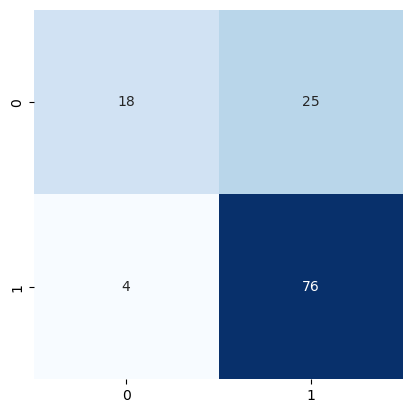

In [54]:
cm = confusion_matrix(Y_test, test_pred)

sns.heatmap(cm, annot =True, fmt ='d', cmap='Blues', cbar = False, square = True, xticklabels=['0', '1'])
plt.show()

In [55]:
print(classification_report(Y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



- The model performs well for the majority class (Class 1) with high precision, recall, and F1-score.
- The model struggles significantly with the minority class (Class 0):
- Recall (0.42) indicates the model is missing many instances of Class 0.
- Precision (0.82) is better, suggesting that when the model predicts Class 0, it's relatively confident, but it does so rarely.
- The reason behind this is the data is highly imbalanced. Model perform well which has majority count.So we need to balance the data.
- For balancing the data, I used an oversampling technique. In this technique, we select minority class rows randomly and add them to the dataset until it balances the dataset.

In [57]:
import imblearn

In [58]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, Y)

print('Original dataset shape', X.shape)
print('Original target dataset shape', Y.shape)
print('Resample dataset shape', x_ros.shape)
print('Resample target dataset shape', y_ros.shape)

Original dataset shape (614, 11)
Original target dataset shape (614,)
Resample dataset shape (844, 11)
Resample target dataset shape (844,)


In [59]:
ros_df = pd.concat([x_ros, y_ros], axis=1)
ros_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


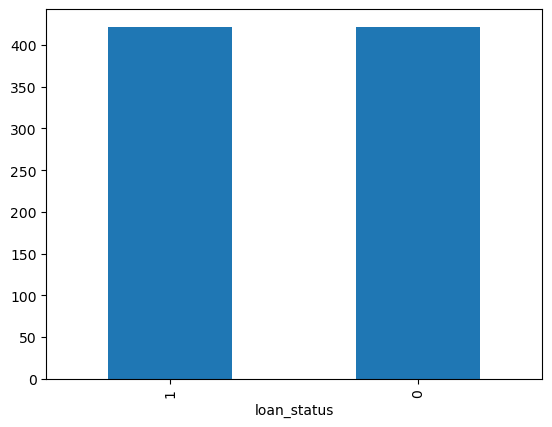

In [61]:
ros_df['loan_status'].value_counts().plot(kind = 'bar')
plt.show()

- Now the target variable is balanced

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state= 42)

In [65]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(675, 11) (675,)
(169, 11) (169,)


In [67]:
x_train.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
468,0,1,2.0,1,0,210,2917.0,98.0,360.0,1.0,1
786,1,0,0.0,0,0,3750,0.0,113.0,480.0,1.0,2
538,1,1,0.0,1,0,2917,536.0,66.0,360.0,1.0,0
266,1,1,2.0,0,0,4708,1387.0,150.0,360.0,1.0,1
352,1,1,3.0,0,0,2666,2083.0,95.0,360.0,1.0,0


In [69]:
model2 = RandomForestClassifier(oob_score=True, random_state=42)
model2 = model2.fit(x_train, y_train)

In [71]:
model2.score(x_test, y_test)

0.8698224852071006

In [75]:
model2.score(x_train, y_train)

1.0

In [77]:
model2.oob_score_

0.8725925925925926

In [79]:
test_pred3 = model2.predict(x_test)

In [81]:
cm = confusion_matrix(y_test, test_pred3)
print(cm)

[[84 10]
 [12 63]]


In [83]:
print(classification_report(y_test,test_pred3))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        94
           1       0.86      0.84      0.85        75

    accuracy                           0.87       169
   macro avg       0.87      0.87      0.87       169
weighted avg       0.87      0.87      0.87       169



- The model performs well for both the class with high precision, recall, and F1-score.

In [85]:
pickle.dump(model2, open('model.pkl', 'wb'))

## Python Flask Application development (35 points)

- Creating a project and virtual environment using pycharm or visual studio code and installing the required packages (5 points)

#### app.py (30 points)
- This is our main application file that is designed to call some of the implemented APIs and methods, such as connecting to the MYSQL database and creating a table for the database, and APIs such as user to register, login, enter_details, predict, and logout.
    - Connect to the MYSQL database and create the class for the table.
        ● User(id, username, password) (can create the table in the database using mysql workbench also)
    - Register: This is a register API. This should take username and password and store the details in the user database.
    - Login: This API should take the username and password of registered users and successfully log them in.
    - Enter Details: This API should render the ‘predict.html’ page, where the user has to enter their details to check the loan eligibility.
    - Predict: This API should render the prediction results on the HTML template.
    - Logout: This API should logout the user

### Submissions:
- Please submit the ‘Model building and saving the model using pickle’ part solution in .html or .ipynb format.
- Python Flask web application project, Kindly zip the project folder and submit your solution.
- Prepare a document and add the screenshots of the home page, register page, data stored in MYSQL, login page, and the prediction page with the predicted results.
- Upload all the required files in the GitHub repository and share the github link.